# Hands-on Support Vector Machine SVM
# Task:
Imaging a scenario where you're a data science for a car company and want to know which which of <br>
the company's custer will buy the recent new car brand model.<br>
# Data set:
- In the Data set each row correspond to a customer and for each of this customer, we have the following information:
  - Age
  - EstimatedSalary
  - Purchased (0 or 1, where 1 means the customer has purchased the previous model and 0 didn't purchase the previous 
    model)<br>
- So we want to predict whether or not the customer will buy that SUV/new model.
# Note:
Implementation is almost the same as **Logistic Regression**, we only need to make some few changes in **Step 4** on where we **build**<br>
and **train the modeL**.

# 0. Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Importing the dataset

In [6]:
# 1. Importing the data set
data_set = pd.read_csv('Social_Network_Ads.csv')

# 2. Localizing the independent variable i.e feature
X = data_set.iloc[:, :-1].values

# 3. Localizing the dependent Variable
Y = data_set.iloc[:, -1].values

# 2. Splitting the dataset into the Training set and Test set

In [7]:
# 1. Importing the Test_Train Library from the model_selection class
from sklearn.model_selection import train_test_split

# Splitting our Data Set into Test and Train Set
# usually 0.2 as test_size but due to the large data we can choose 0.25 as test_size
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [8]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [9]:
print(Y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [10]:
print(X_test)            # Set of Customers who purchase yes/No the new SUV

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [11]:
print(Y_test)         # Purchase decision i.e. whether or not they bought the new SUV

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


# 3.Feature Scaling
Done after splitting the dataset, in other to avoid data leakage.

In [12]:
# 1. importing the StandardScaler class library
from sklearn.preprocessing import StandardScaler

# 2. Creating StandardScalar Object, used to call method of the class
sc = StandardScaler()

# 3. Scaling the Features i.e independent variables i.e. age and estimate salary
X_train = sc.fit_transform(X_train)  # Transforming/scaling and then storing it X_train
                                     # we don't have to select any index range as was the case with linear regression
X_test = sc.transform(X_test)

# 4. We should scale the dependent variable because it's already in the range of 0 and 1

In [13]:
print(X_train)             # scaled data will be in the range between -3 and +3

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [14]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

Since we did not apply feature scaling to y, we will not need to print the y_train and y_test.

# 4. Fitting svm to the Training set
# /Training the SVM model on the Training

In [15]:
# 1. importing our SVC class
from sklearn.svm import SVC

# 2. Creating an object of the class/ Building the Model
classifier = SVC(kernel = 'rbf', random_state = 0)     # SVC Class allow us to built kernel SVM 
                                                       # rbf = radial basis function  and is a non linear kernel.

# 3. Training the Model using the training set
classifier.fit(X_train, Y_train)                  # Takes the matrix of features X_train and the dependent variable Y_train of the training set as input.

SVC(random_state=0)

# 5. Predicting a new result/one data point
Predicting whether a customer with Age = 30 and EstimatedSalary = 87000 $ will buy the new car model.<br>
- This data point is taken from X_test and Y_test, the  result of Y_test was 0, so we want to see if the <br>
  model will predict the same result as in Y_test.

In [16]:
# 1. Predict() method as any other methods has to be called from the object.
classifier.predict(sc.transform([[30, 87000]]))    # Predict() always expect a 2D array 
                                      # 30, 87000 as Parameter in the 2D
                                      # Then scale the Observation.
                                      # Predict method can only be used on the feature with the same scale as the one used for ..
                                      # ... for the training. there we need to applied the transform format to give it the ...
                                      # ... a correct scale.

# We will have a nice result format if we place it in a print.
print(classifier.predict(sc.transform([[30, 87000]])) )

[0]


Result: 0, so the model predicted that the customer will not buy the new car model.

# 5. Predicting the Test set results
# /Predicting the results of the Test set
The predict method has to be called on the set of feature of the same shape as the one used to train the model.
- Displaying the vector of prediction and the vector of actual results next to each other.

In [17]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))
# on the right it he prediction and on the left is the real purchase decision of the dataset

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# 6. Evaluating the Model using Confusion Matrix & Accuracy Score
The confusion matrix is a simple 2D matrix that allows us to visualize the performance of the classification model.<br>
- It compares the actual target values with those predicted by the model.
Creating the confusion matrix to evaluate the performance of the model.
- The confusion matrix will show us exactly the number of correct and incorrect predictions made by the model.
  - i.e will give us the accuracy of the model. i.e how many mistake our model made.

In [18]:
# 1. importing the confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score

# 2. Applying the confusion matrix on to the vector of prediction and real result
cm = confusion_matrix(Y_test, Y_pred)     # since the matrix is always evaluated on the test set and on the prediction
                                          # cm stand for confusion matrix and store the out put return by the method.
print(cm)

# 3. Getting the accuracy on the test set
accuracy_score(Y_test, Y_pred)            # will return automatically the accuracy

[[64  4]
 [ 3 29]]


0.93

Did not beat the KNN model in term of accuracy because, for the SVM model we choose a linear kernel,<br> 
which is not the best kernel to use for the classification problem.

- 64 correct predictions of the class 0 (i.e 64 correct prediction that the customer of the test set will not purchased the new car model) 
- 29 correct predictions of the class 1 (i.e. 29 correct prediction that the customer will purchased the new car model)
- 3 incorrect predictions of the class 0 (customer who bought but where predicted didn't buy) 
- 4 incorrect prediction of the class 1 meaning that 4 incorrect prediction that the customer did not buy but was predicted to buy.
- 0.89 accuracy of the model. since the test set hat 100 customers, the model made 89 correct prediction and 11 incorrect predictions.

# 7. Visualizing the Training and Test set results
We're going to see how the logistic regression model acting on the training set on a 2D plot.<br>
- We will plot the two classes of customers (those who purchased and those who did not purchase) on two different colors/region.<br>
- These two regions is exactly the classification curve of the logistic regression model.<br>
- The classification curve is the line that separates the two classes of customers.<br>
  - It will be a straight line for linear model and a curve for non-linear model.<br>
- on 2D plot, the x-axis will correspond the Age and the y-axis will correspond to the EstimatedSalary.<br>
  - Each of the observation seen on the 2D plot will correspond to a specific customer.
  - The prediction region is the most interesting part, meaning the region where our logistic regression model predict the class 0<br>
    meaning the customer did not buy the SUV and the other region where the model predict the class 1 meaning the customer bought<br>
    the SUV.
  - Last what is most interesting to see is the curve separating this two region. i.e region of the prediction 0 and region of the<br>
    prediction 1.

# Visualizing the Training set result
- we will probably never use the code below again, simply because it works only on two features.

C:\Users\user\AppData\Local\Temp\ipykernel_13748\2478298002.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


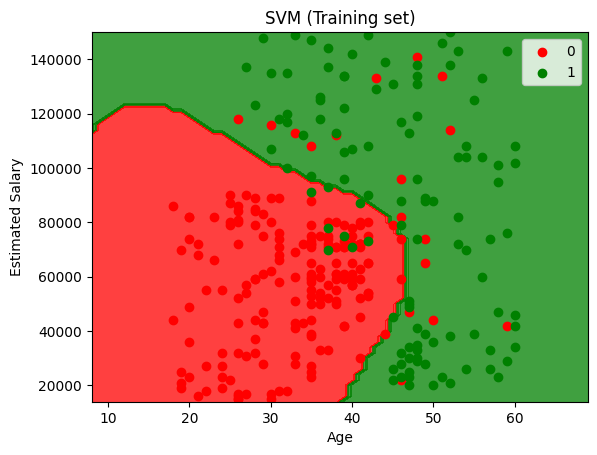

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 2000))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel-SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualizing the Training set result

C:\Users\user\AppData\Local\Temp\ipykernel_13748\1933757839.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


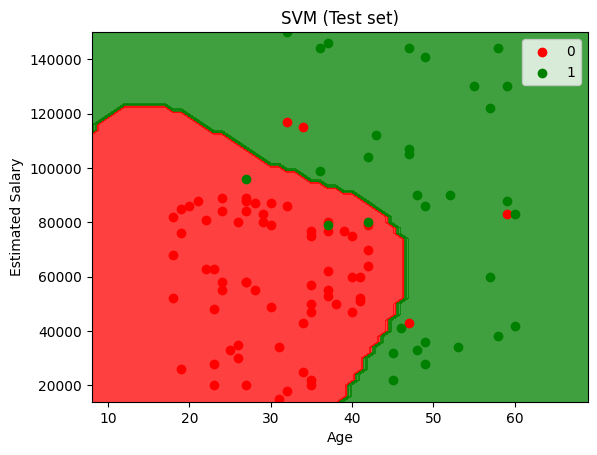

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 2000))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel-SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()